In [1]:
import numpy as np
from tensorflow import keras

In [2]:
from keras.models import load_model

In [4]:
model = load_model("_MNIST_keras.h5")

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [15]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [16]:
from tensorflow.keras.utils import to_categorical
y_test_reshape = to_categorical(y_test,10)
print(y_test_reshape.shape)

(10000,)


In [12]:
X_test_reshape = X_test.reshape(X_test.shape[0],28,28,1)
X_test_reshape.shape

(10000, 28, 28, 1)

In [13]:

model.evaluate(X_test_reshape, y_test_reshape)

313/313 [==============================] - 8s 26ms/step - loss: 0.0600 - accuracy: 0.9828


[0.06002267450094223, 0.9828000068664551]

In [18]:
import random
import matplotlib.pyplot as plt

In [24]:
X_test_reshape[idx].reshape(1,28,28,1).shape

(1, 28, 28, 1)

9 [9]


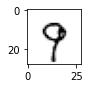

In [32]:
# Lets visualize this
# pick a random image
idx = random.randint(0,1000)
truelabel = y_test[idx]
inputarr = X_test_reshape[idx]
plt.figure(figsize=(1,1))
plt.imshow(X_test[idx],cmap="Greys")
predictedlabel = model.predict(X_test_reshape[idx].reshape(1,28,28,1))
print(truelabel,np.argmax(predictedlabel,axis=1))

In [36]:
# Save this model for tensorflow lite android
from tensorflow import lite

In [41]:
converter = lite.TFLiteConverter.from_keras_model(model)

In [42]:
tfliteModel = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\arka\AppData\Local\Temp\tmpa99hjymf\assets


INFO:tensorflow:Assets written to: C:\Users\arka\AppData\Local\Temp\tmpa99hjymf\assets


In [43]:
with open("MNiST.tflite","wb") as openfile:
    openfile.write(tfliteModel)

In [44]:
# Evaluate the tflite model
import tensorflow as tf

In [45]:
interpreter = tf.lite.Interpreter(model_path="./MNiST.tflite")

In [46]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [49]:
print(input_details[0]['shape'],input_details[0]['dtype'])

[ 1 28 28  1] <class 'numpy.float32'>


In [50]:
print(output_details[0]['shape'],output_details[0]['dtype'])

[ 1 10] <class 'numpy.float32'>
